# Análise Exploratória dos Dados
* Conjunto de dados: `spanish_wines` (qualidade do vinho espanhol)
* Equipe Datatives:
  - Mike Alcantara
  - Milena Ribeiro
  - Müller Pereira
  - Rene Francisco Ferreira Santos  
  - Welder Garrido
  

## Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown
import seaborn as sns
import numpy as np
import itertools

In [ ]:
# @title Leitura do conjunto de dados

df = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/main/spanish_wines.csv')

In [ ]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Últimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


### Últimas linhas

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
7499,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


### Quantidade de valores únicos

,0
winery,480
wine,847
year,71
rating,8
num_reviews,817
country,1
region,76
price,1292
type,21
body,4


In [ ]:
# @title Dados faltantes

# percentual de dados faltantes em cada coluna

round((df.isna()).sum() / df.shape[0] * 100, 2)

,0
winery,0.00
wine,0.00
year,0.03
rating,0.00
num_reviews,0.00
country,0.00
region,0.00
price,0.00
type,7.27
body,15.59


---
**Possíveis causas dos dados faltantes:**

- `year` (0,03%):	Erros de extração ou dados históricos incompletos.

- `type` (7,27%):	Categoria não informada, vinho genérico ou falta de padronização na coleta.

- `body` e `acidity` (15,59%):	Avaliações subjetivas ausentes; nem todos os vinhos foram analisados sensorialmente.
---

## Características do Dataset

---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 7500 unidades amostrais com 11 variáveis
 - Classificação das variáveis:
    - Quantitativa contínua: `rating`, `price`
    - Quantitativa discreta: `year`, `num_reviews`
    - Qualitativa nominal: `winery`, `wine`, `country`, `region`, `type`
    - Qualitativa ordinal: `body`, `acidity`
---

In [ ]:
#@title Dicionário de Dados

df_dict = pd.DataFrame(
    [
        {'variavel': 'winery', 'descricao': 'nome da vinicola', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'wine', 'descricao': 'nome do vinho', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'year', 'descricao': 'ano em que as uvas foram colhidas', 'tipo': 'quantitativa', 'subtipo': 'discreta'},
        {'variavel': 'rating', 'descricao': 'avaliacao do vinho', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'num_reviews', 'descricao': 'numero de avaliacoes do vinho', 'tipo': 'quantitativa', 'subtipo': 'discreta'},
        {'variavel': 'country', 'descricao': 'pais de origem do vinho (Espanha)', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'region', 'descricao': 'regiao do vinho', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'price', 'descricao': 'preco do vinho (€)', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'type', 'descricao': 'variedade do vinho', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'body', 'descricao': 'corpo do vinho', 'tipo': 'qualitativa', 'subtipo': 'ordinal'},
        {'variavel': 'acidity', 'descricao': 'acidez do vinho', 'tipo': 'qualitativa', 'subtipo': 'ordinal'}

    ]
)
df_dict

,variavel,descricao,tipo,subtipo
0,winery,nome da vinicola,qualitativa,nominal
1,wine,nome do vinho,qualitativa,nominal
2,year,ano em que as uvas foram colhidas,quantitativa,discreta
3,rating,avaliacao do vinho,quantitativa,continua
4,num_reviews,numero de avaliacoes do vinho,quantitativa,discreta
5,country,pais de origem do vinho (Espanha),qualitativa,nominal
6,region,regiao do vinho,qualitativa,nominal
7,price,preco do vinho (€),quantitativa,continua
8,type,variedade do vinho,qualitativa,nominal
9,body,corpo do vinho,qualitativa,ordinal


In [ ]:
df['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [ ]:
# Converter 'year' para numérico e remover linhas com NaN
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df = df.dropna(subset=["year"]).copy()  # Remove linhas onde 'year' é NaN
df["year"] = df["year"].astype(int)  # Converter para inteiro

In [ ]:
df['year'].unique()

array([2013, 2018, 2009, 1999, 1996, 1998, 2010, 1995, 2015, 2011, 2016,
       1970, 1946, 1962, 2019, 2004, 1931, 1979, 2005, 2020, 2014, 1985,
       1929, 2007, 2012, 2017, 2008, 2006, 2000, 2003, 2002, 1991, 1994,
       1990, 1989, 1987, 1986, 1981, 2001, 1968, 1964, 1982, 1974, 1983,
       1955, 1980, 1972, 1953, 1958, 1942, 1965, 1992, 1973, 1997, 1967,
       1975, 1910, 1961, 1954, 1988, 1969, 1951, 1928, 1976, 1949, 2021,
       1959, 1922, 1978, 1925])

---
Na hora de plotar as vairáveis quantitivas deu um erro, pois `year` estava como object. Além disso tinham valores "N.V." e "nan", que foram removidos.

---

## Análise Univariada

In [ ]:
# @title Estatística Descritiva
display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

         winery     wine country region       type
count      7210     7210    7210   7210       6672
unique      445      777       1     72         21
top     Contino  Reserva  Espana  Rioja  Rioja Red
freq        457      467    7210   2440       2357


### Variáveis quantitativas

              year       rating   num_reviews        price         body  \
count  7210.000000  7210.000000   7210.000000  7210.000000  6070.000000   
mean   2013.495839     4.255381    448.206935    61.508695     4.163756   
std       6.940450     0.118609    615.388822   152.837021     0.593981   
min    1910.000000     4.200000     25.000000     5.500000     2.000000   
25%    2011.000000     4.200000    389.000000    19.900000     4.000000   
50%    2015.000000     4.200000    404.000000    28.530000     4.000000   
75%    2017.000000     4.200000    415.000000    53.775000     5.000000   
max    2021.000000     4.900000  16505.000000  3119.080000     5.000000   

           acidity  
count  6070.000000  
mean      2.947117  
std       0.242883  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       3.000000  


---
 - A região `Rioja` é a que mais possui registros, e `Rioja Red` é o vinho que mais aparece.
 - `Contino` é a vinícula com maior frequência, e `Reserva` o vinho mais popular.
 - O preço médio do vinho é de `61,50 €`, com mediana de `28,53 €`.
---

### Distribuição das variáveis


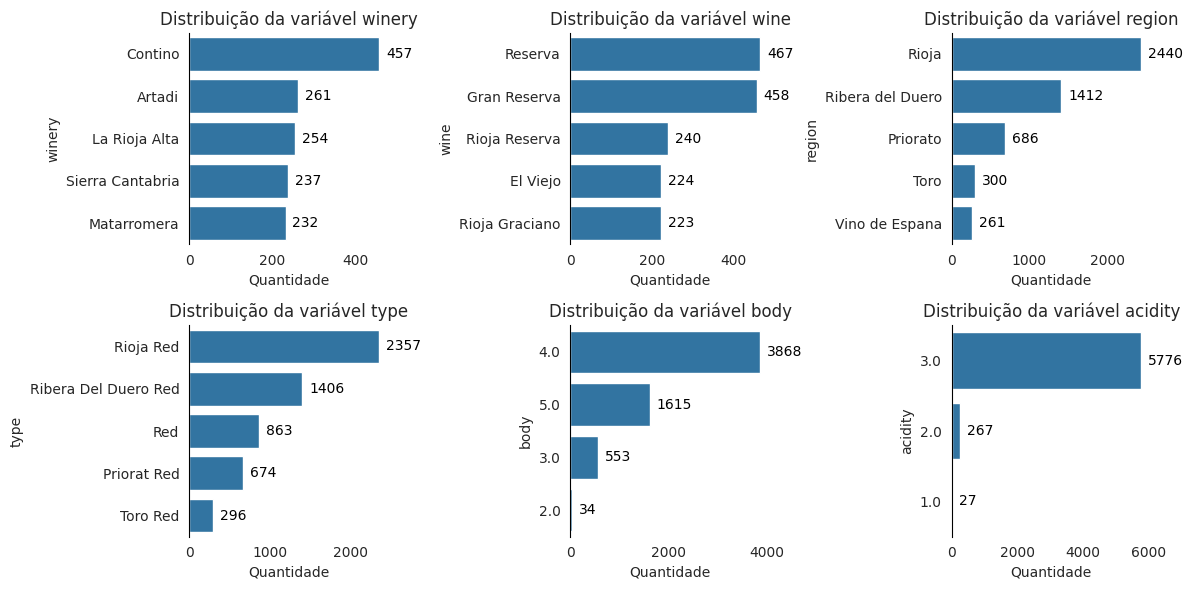

In [ ]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()
variaveis_qualitativas = [v for v in variaveis_qualitativas if v != 'country']  # Remover 'country'

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = df[variavel].value_counts().index[:5] # Pegar os 5 valores mais frequentes
    ax = axes[i]
    # Criar a figura
    ax = sns.countplot(data=df, y=variavel, order=order, alpha=1, ax=ax)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
        ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()

---
### `Insights gerais`

- **Distribuição desbalanceada:**	Algumas categorias dominam: `Rioja`, `Contino`, `Reserva`, `Rioja Red`.

- **Variáveis pouco informativas:**	`acidity` e `body` têm baixa variabilidade — podem não ajudar em modelos preditivos.

- **Necessidade de padronizaçã:**	Nomes como `wine`, `type` e `region` podem ter redundância ou inconsistência.

- **Combinações úteis:**	Juntar `wine + winery`, ou `type + region` pode gerar features mais informativas.
---

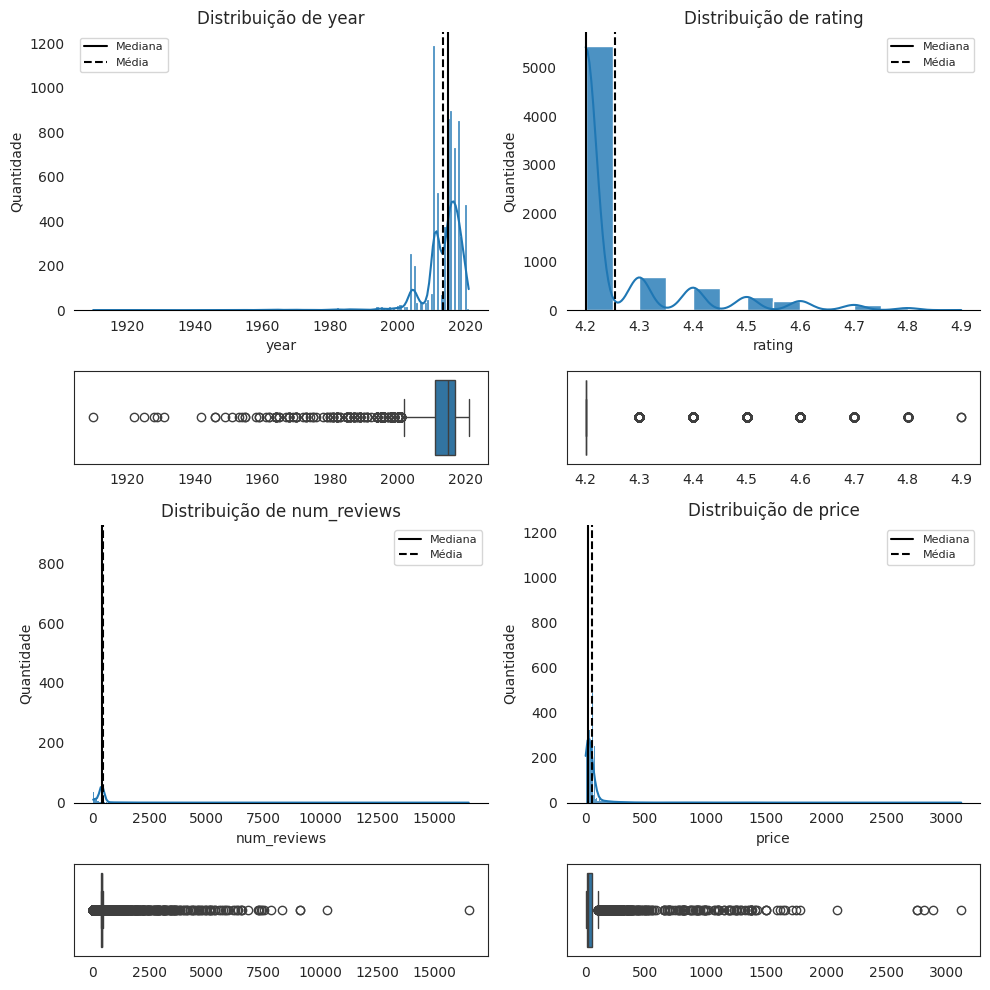

In [ ]:
# @title Variáveis quantitativas
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

n = len(variaveis_quantitativas)
ncols = 2
nrows = (n + 1) // ncols  # Arredondamento pra cima

fig, axes = plt.subplots(
    figsize=(10, 5 * nrows),
    ncols=ncols,
    nrows=nrows * 2,  # Cada variável usa 2 linhas: 1 para histograma/KDE, 1 para boxplot
    gridspec_kw={"height_ratios": [3, 1] * nrows}
)

axes = axes.reshape(nrows, 2, 2)  # (variável, [hist, box], coluna)

for idx, variavel in enumerate(variaveis_quantitativas):
    row = idx // ncols
    col = idx % ncols

    # Histograma + KDE
    ax = sns.histplot(data=df, x=variavel, ax=axes[row][0][col], kde=True, alpha=.8)
    ax.axvline(df[variavel].median(), color="black", label="Mediana")
    ax.axvline(df[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição de {variavel}", ylabel="Quantidade")
    ax.legend(fontsize=8)
    ax.title.set_size(12)
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Boxplot
    sns.boxplot(data=df, x=variavel, ax=axes[row][1][col])
    axes[row][1][col].set(xlabel="")

# Ocultar subplots não usados (caso o número de variáveis não seja par)
if n % ncols != 0:
    for j in range(2):
        axes[-1][j][1].axis("off")

plt.tight_layout()
plt.show()

---
### `Insights gerais`

- **Assimetria:**	Todas as variáveis, exceto talvez `year`, têm distribuição fortemente assimétrica.

- **Outliers:**	Muito presentes em `price`, `num_reviews` e `rating`.

-  **Escala ruim para modelagem:**	As variáveis `price` e `num_reviews` precisam de transformações (log, robust scaler).

- **Necessidade de tratamento:**	Provável limpeza: valores antigos em `year`, outliers extremos, e padronização de formatos.

---

## Análise Bivariada

### Relação Entre Variáveis Quantitativas

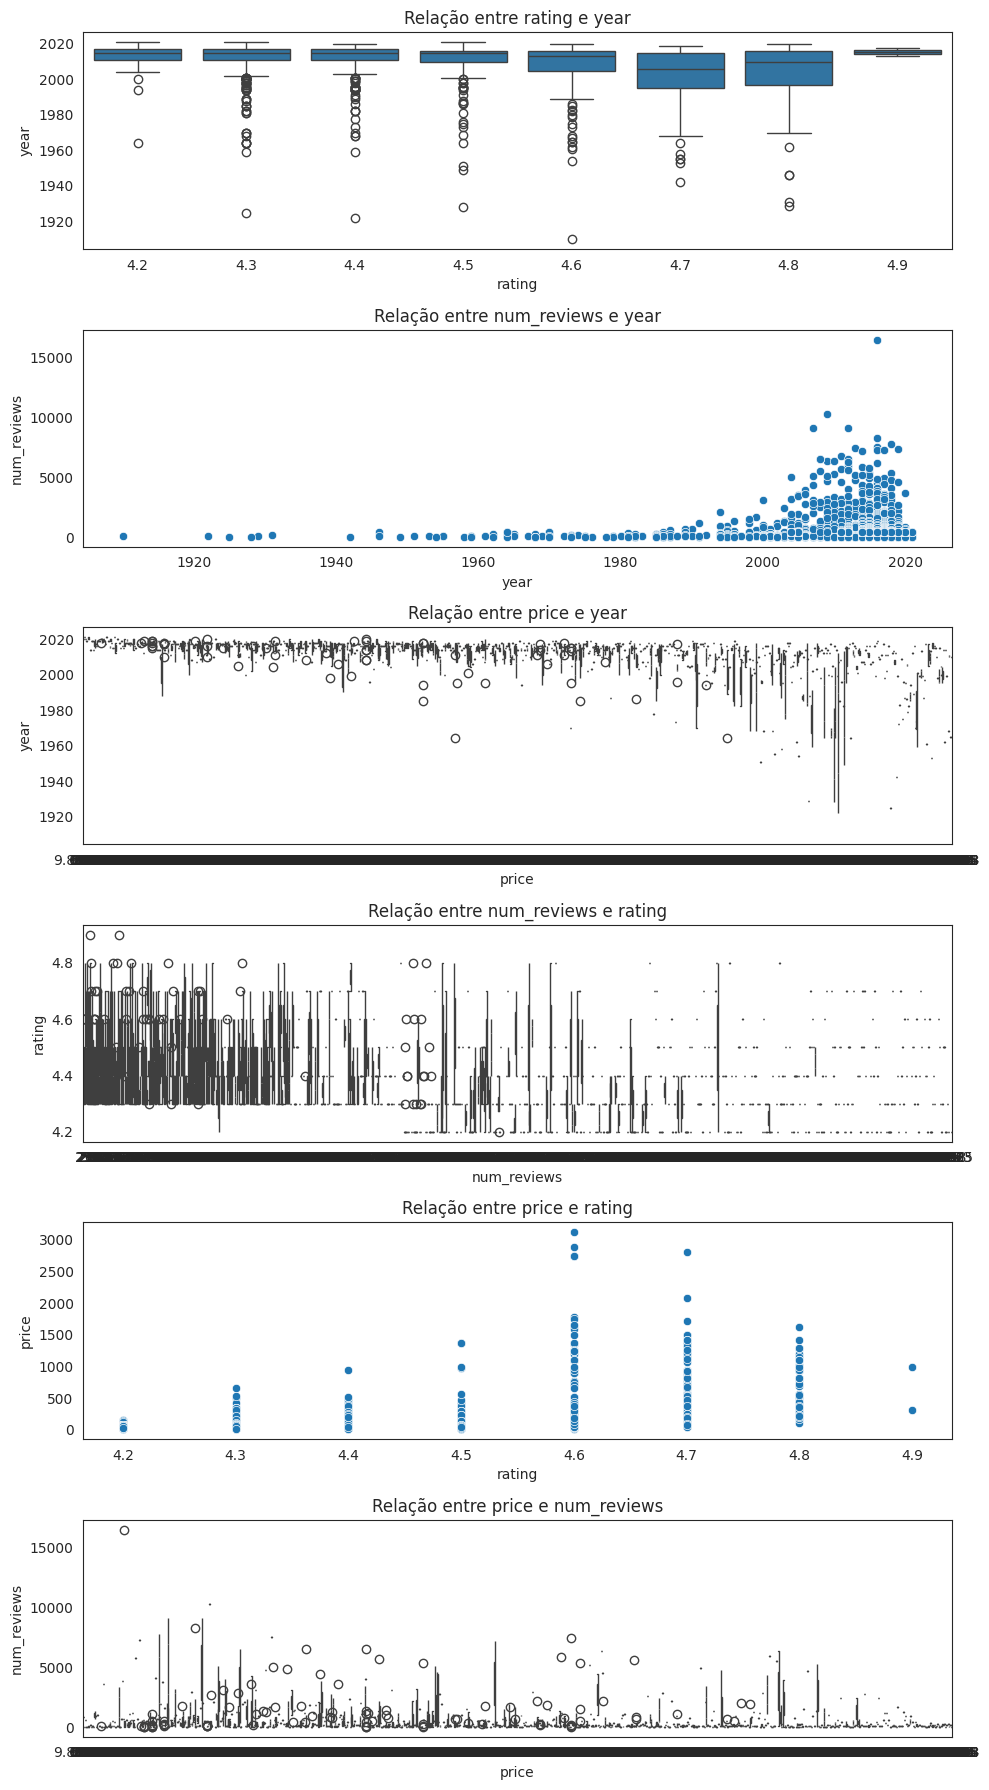

In [ ]:
# @title Comportamento par a par

combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
num_combinacoes = len(combinacoes)

# Ajustar número de colunas e linhas dinamicamente
ncols = 1  # Por exemplo, fixar em 3 colunas
nrows = (num_combinacoes + ncols - 1) // ncols  # Calcular número de linhas necessário

fig, axes = plt.subplots(figsize=(10, 3 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])
    else:
        sns.boxplot(data=df, y=var_1, x=var_2, ax=axes[i])
    axes[i].set(title=f"Relação entre {var_2} e {var_1}")

# Remover eixos não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

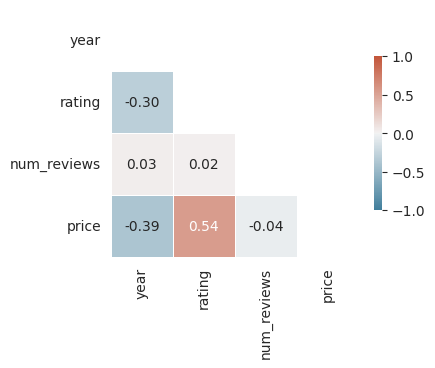

In [ ]:
# @title Correlação

# Remover variáveis categóricas antes de calcular a correlação
variaveis_categoricas = ['body', 'acidity']
corr = df.drop(columns=variaveis_categoricas).corr(numeric_only=True)

# Gerar uma máscara para o triângulo
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

# Configurar a figura
f, ax = plt.subplots(figsize=(4, 4))

# Gerar um mapa de calor divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Faz o mapa de calor com a máscara e a proporção correta
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f"
)
plt.show()

---
### `Insights gerais`

- **Assimetria:**	Todas as variáveis, exceto talvez `year`, têm distribuição fortemente assimétrica.

- **Outliers:**	Muito presentes em `price`, `num_reviews` e `rating`.

-  **Escala ruim para modelagem:**	As variáveis `price` e `num_reviews` precisam de transformações (log, robust scaler).

- **Necessidade de tratamento:**	Provável limpeza: valores antigos em `year`, outliers extremos, e padronização de formatos.

- **Correlação:** Maior relação entre `price`e `rating` indicando que, possivelmente, vinhos mais caros possuem melhores avaliações.

---


## Análise multivariada

---
 - Após a análise descritiva das variáveis qualitativas e quantitativas, buscamos compreender como algumas dessas variáveis numéricas se relacionam entre si. Para isso, utilizamos a matriz de correlação, que avalia o grau de associação entre duas variáveis quantitativas.

- A seguir, calculamos e visualizamos a matriz de correlação entre as variáveis: rating, year e price.
---

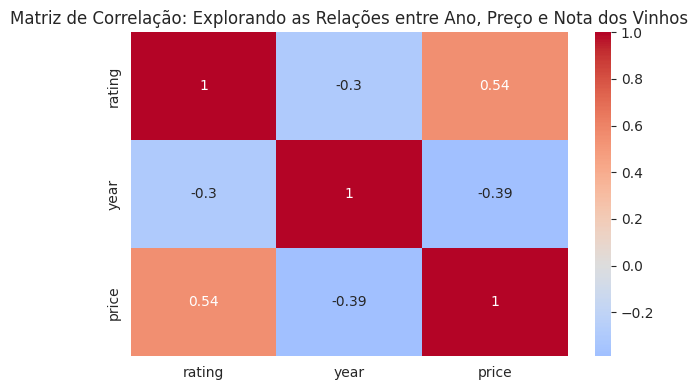

In [ ]:
# @title Matriz de correlação

# Limpeza e preparo dos dados
df.loc[:, 'year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year']).copy()
df['year'] = df['year'].astype(int)

# Filtra apenas as colunas desejadas e remove valores ausentes
df_filtrado = df[['rating', 'year', 'price']].dropna()

# Calcula a matriz de correlação real
correlation_matrix = df_filtrado.corr()

# Heatmap com a matriz real
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação: Explorando as Relações entre Ano, Preço e Nota dos Vinhos')
plt.tight_layout()
plt.show()

---
- A rating tem uma correlação negativa com o year (-0.30), ou seja, vinhos mais antigos tendem a ter notas mais altas. Isso faz sentido, já que vinhos envelhecidos podem ser mais valorizados.

- O price também tem uma correlação negativa com o year (-0.39), sugerindo que vinhos mais antigos são, em média, mais caros.

- O rating e o price têm uma correlação positiva (0.54), ou seja, vinhos mais caros tendem a ter notas mais altas.
---

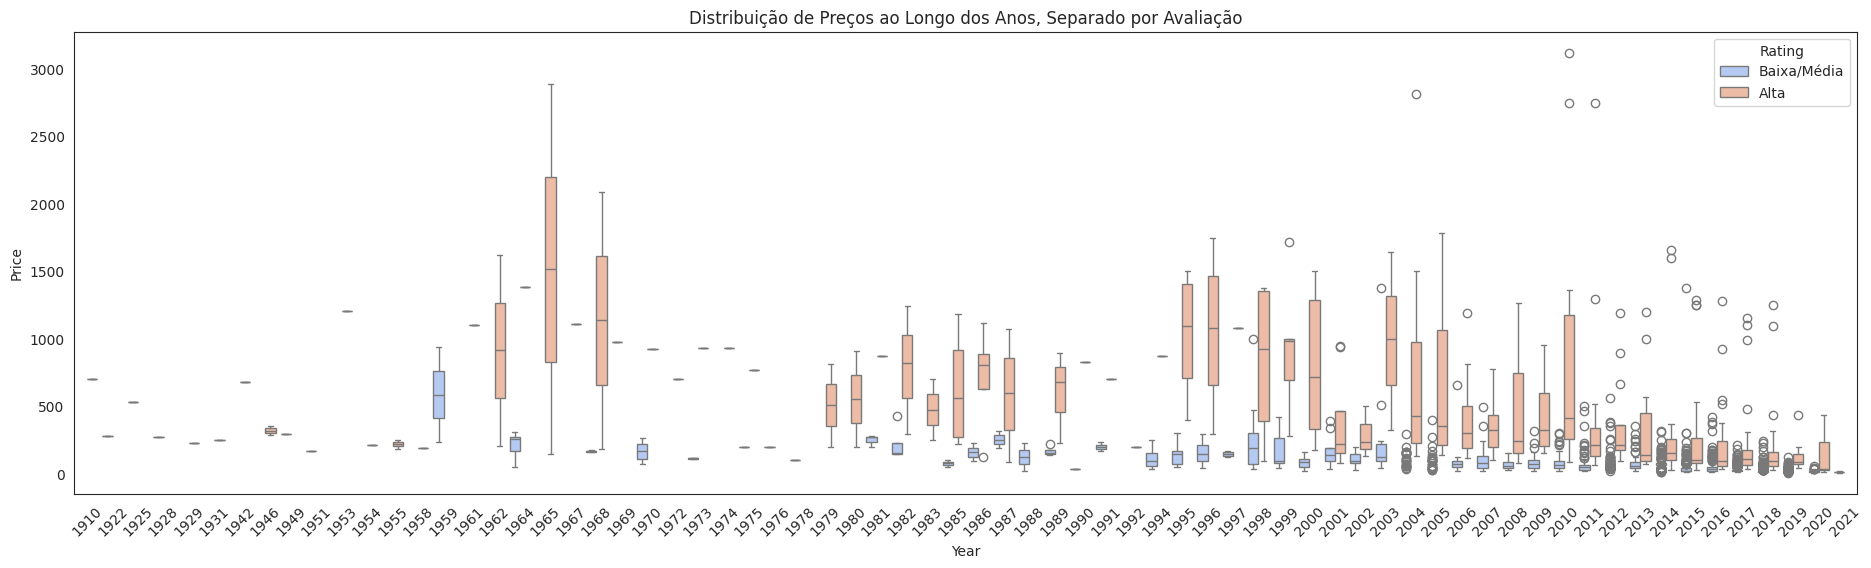

In [ ]:
# @title Distribuição de Preços por Ano  e Faixa de Avaliação
#criando uma categoria (ou faixa) de notas
df_filtrado['rating_bin'] = pd.cut(
    df_filtrado['rating'],
    bins=[df_filtrado['rating'].min(), 4.5, df_filtrado['rating'].max()],
    labels=["Baixa/Média", "Alta"],
    include_lowest=True
)

plt.figure(figsize=(23, 6))
sns.boxplot(data=df_filtrado, x='year', y='price', hue=df_filtrado['rating_bin'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribuição de Preços ao Longo dos Anos, Separado por Avaliação")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="Rating")
plt.show()

---
Para aprofundar a análise multivariada, foi criado um gráfico de boxplot que relaciona o preço dos vinhos com o ano de produção, separando-os por faixas de avaliação (rating). As notas foram agrupadas em duas categorias: “Baixa/Média” (até 4.5) e “Alta” (acima de 4.5).

O gráfico mostra que:

Em geral, vinhos mais antigos apresentam preços mais altos.

Vinhos com nota alta tendem a estar na faixa de preço mais elevada em vários anos.

Existe maior variabilidade de preço entre os vinhos bem avaliados, especialmente em anos específicos.

---

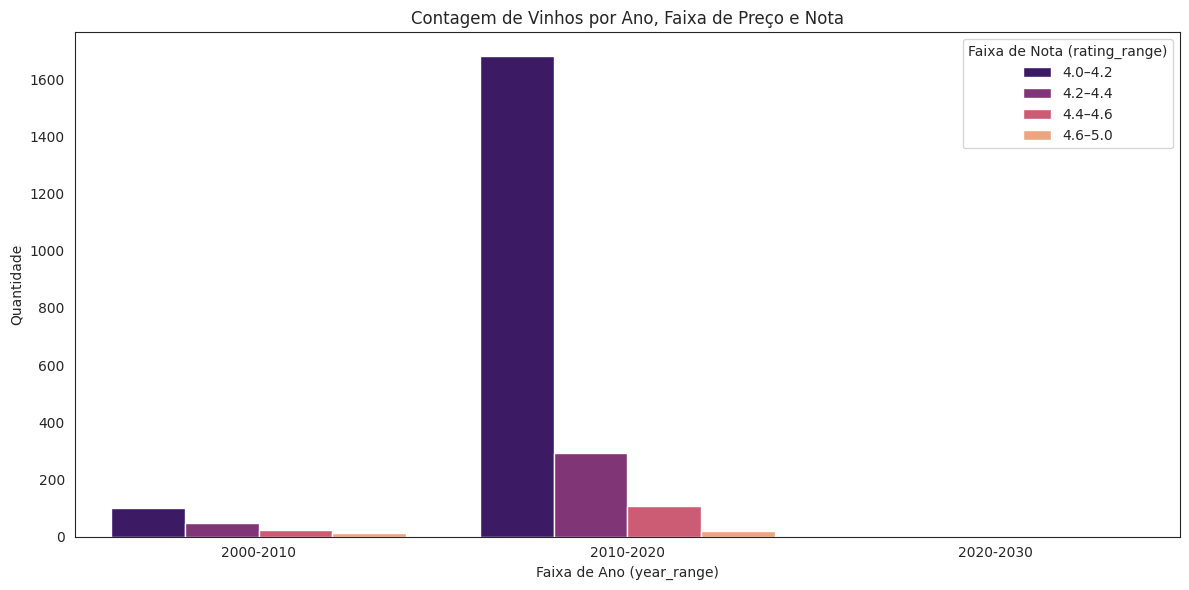

In [ ]:
# @title Gráfico de Contingência da Análise Multivariada
# Corrigir a criação da faixa de nota
bins = [4.0, 4.2, 4.4, 4.6, 5.0]
labels = ['4.0–4.2', '4.2–4.4', '4.4–4.6', '4.6–5.0']
df['rating_range'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

# Criar a faixa de ano (year_range)
bins_year = [2000, 2010, 2020, 2030]  # Ajuste os anos conforme necessário
labels_year = ['2000-2010', '2010-2020', '2020-2030']
df['year_range'] = pd.cut(df['year'], bins=bins_year, labels=labels_year, include_lowest=True)

# Criar a faixa de preço (price_range)
bins_price = [0, 1000, 2000, 3000, 4000]
labels_price = ['0-1000', '1000-2000', '2000-3000', '3000-4000']
df['price_range'] = pd.cut(df['price'], bins=bins_price, labels=labels_price, include_lowest=True)

# Remover linhas com valores nulos nas faixas
df_limpo = df.dropna(subset=['year_range', 'price_range', 'rating_range'])

# Criar tabela de contingência com os dados limpos
contingencia = pd.crosstab(
    [df_limpo['year_range'], df_limpo['price_range']],
    df_limpo['rating_range']
)

# Transformar em formato longo para usar no Seaborn
tabela_plot = contingencia.reset_index().melt(
    id_vars=['year_range', 'price_range'],
    var_name='rating_range',
    value_name='count'
)

# Gráfico de barras agrupadas com Seaborn
plt.figure(figsize=(12,6))
sns.barplot(
    data=tabela_plot,
    x='year_range',
    y='count',
    hue='rating_range',
    palette='magma',
    errorbar=None
)
plt.title('Contagem de Vinhos por Ano, Faixa de Preço e Nota')
plt.xlabel('Faixa de Ano (year_range)')
plt.ylabel('Quantidade')
plt.legend(title='Faixa de Nota (rating_range)')
plt.tight_layout()
plt.show()


---
- O gráfico acima representa uma tabela de contingência multivariada construída a partir da combinação de três variáveis: ano de produção do vinho (year_range), faixa de preço (price_range) e faixa de nota (rating_range). A visualização permite observar como a quantidade de vinhos se distribui ao longo dos anos, em diferentes faixas de preço e avaliação.
---

In [ ]:
# @title Análise Multivariada Interativa

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# --- VARIÁVEIS DISPONÍVEIS ---
variaveis_quantitativas = ['year', 'rating', 'num_reviews', 'price']
variaveis_qualitativas = ['winery', 'wine', 'region', 'type', 'body', 'acidity']

# --- FACETÁVEIS: Apenas variáveis com <= 10 categorias únicas ---
facetáveis = [v for v in variaveis_qualitativas if df[v].nunique() <= 10]

# --- WIDGETS ---
x_dropdown = widgets.Dropdown(
    options=variaveis_quantitativas,
    value='price',
    description='Eixo X:',
    layout=widgets.Layout(width='250px')
)

y_dropdown = widgets.Dropdown(
    options=variaveis_quantitativas,
    value='rating',
    description='Eixo Y:',
    layout=widgets.Layout(width='250px')
)

color_dropdown = widgets.Dropdown(
    options=variaveis_qualitativas,
    value='type',
    description='Colorir por:',
    layout=widgets.Layout(width='250px')
)

facet_dropdown = widgets.Dropdown(
    options=[None] + facetáveis,
    value=None,
    description='Faceta:',
    layout=widgets.Layout(width='250px')
)

# Filtros por faixa de preço e ano
preco_min, preco_max = int(df['price'].min()), int(df['price'].max())
ano_min, ano_max = int(df['year'].min()), int(df['year'].max())

price_slider = widgets.IntRangeSlider(
    value=[preco_min, preco_max],
    min=preco_min,
    max=preco_max,
    step=1,
    description='Faixa Preço:',
    continuous_update=False,
    layout=widgets.Layout(width='500px')
)

year_slider = widgets.IntRangeSlider(
    value=[ano_min, ano_max],
    min=ano_min,
    max=ano_max,
    step=1,
    description='Ano:',
    continuous_update=False,
    layout=widgets.Layout(width='500px')
)

# --- FUNÇÃO PARA ATUALIZAR O GRÁFICO ---
def atualizar_grafico(x, y, color, facet, price_range, year_range):
    df_filtrado = df[
        (df['price'] >= price_range[0]) & (df['price'] <= price_range[1]) &
        (df['year'] >= year_range[0]) & (df['year'] <= year_range[1])
    ].copy()

    # Reduzir número de categorias na faceta (para evitar erro no plotly)
    if facet is not None and df_filtrado[facet].nunique() > 6:
        top_categorias = df_filtrado[facet].value_counts().index[:6]
        df_filtrado = df_filtrado[df_filtrado[facet].isin(top_categorias)]

    fig = px.scatter(
        df_filtrado,
        x=x,
        y=y,
        color=color,
        facet_col=facet,
        opacity=0.6,
        hover_data=['wine', 'winery', 'region'],
        title=f"{y} vs {x} segmentado por {color}" + (f" e facetas por {facet}" if facet else ""),
        template="plotly_white"
    )
    fig.update_layout(height=600)
    fig.show()

# --- LAYOUT INTERATIVO ---
ui = widgets.VBox([
    widgets.HBox([x_dropdown, y_dropdown]),
    widgets.HBox([color_dropdown, facet_dropdown]),
    price_slider,
    year_slider
])

out = widgets.interactive_output(
    atualizar_grafico,
    {
        'x': x_dropdown,
        'y': y_dropdown,
        'color': color_dropdown,
        'facet': facet_dropdown,
        'price_range': price_slider,
        'year_range': year_slider
    }
)

# --- EXIBIR INTERFACE ---
display(ui, out)

Output()

## Tratamento de Dados

In [ ]:
# @title Drop coluna country
df = df.drop(columns=["country"]) # country só tinha uma valor então achamos melhor dropar a coluna.
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,rating_range,year_range,price_range
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0,4.6–5.0,2010-2020,0-1000
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0,4.6–5.0,2010-2020,0-1000
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,4.6–5.0,2000-2010,0-1000
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,4.6–5.0,NaN,0-1000
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,4.6–5.0,NaN,0-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0,4.0–4.2,2010-2020,0-1000
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0,4.0–4.2,2010-2020,0-1000
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0,4.0–4.2,2010-2020,0-1000
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,4.0–4.2,2010-2020,0-1000


In [ ]:
# @title Imputação dos dados categóricos faltantes com aprendizagem de máquina
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Função para imputar variáveis categóricas ausentes
def impute_missing_values(df, target_column):
    # Dividir os dados em treinamento e imputação
    train = df[df[target_column].notnull()]
    missing = df[df[target_column].isnull()]

    # One-hot encoding para variáveis preditoras
    X_train = pd.get_dummies(train.drop(columns=[target_column]), drop_first=True)
    y_train = train[target_column]

    X_missing = pd.get_dummies(missing.drop(columns=[target_column]), drop_first=True)
    # Garantir que as colunas correspondam entre treino e imputação
    X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)

    # Treinar o modelo
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Prever os valores ausentes
    missing[target_column] = model.predict(X_missing)

    # Atualizar o DataFrame original
    df.update(missing)
    return df

# Imputar valores ausentes para 'type'
df = impute_missing_values(df, 'type')

# Imputar valores ausentes para 'body'
df = impute_missing_values(df, 'body')

# Imputar valores ausentes para 'acidity'
df = impute_missing_values(df, 'acidity')

# Verificar se existem dados ausentes remanescentes
print("Dados faltantes após imputação:")
print(df.isnull().sum())

<ipython-input-322-cbcf305f607e>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-cbcf305f607e>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dados faltantes após imputação:
winery            0
wine              0
year              0
rating            0
num_reviews       0
region            0
price             0
type              0
body              0
acidity           0
rating_range      0
year_range      165
price_range       0
dtype: int64


<ipython-input-322-cbcf305f607e>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Por que RandomForest?

---
**Lida naturalmente com classes (categorias):**
O Random Forest é um modelo de classificação por natureza, ideal para prever rótulos categóricos.

**Capta relações não lineares:**
Ele detecta padrões complexos entre as variáveis — o que é ótimo em datasets com variáveis mistas (quantitativas + qualitativas).

**Resistente a outliers e ruído:**
Isso é especialmente útil se o seu conjunto de dados ainda estiver "cru".

**Imputação por aprendizado supervisionado:**
Diferente de técnicas simples (como preencher com a moda), o Random Forest aprende com os dados conhecidos para prever os ausentes, o que tende a ser mais preciso.

---

In [ ]:
# @title Mapeamento da variável body

# Mapear valores e converter para categórico ordenado
mapeamento_body = {
    1.0: "Muito leve",
    2.0: "Leve",
    3.0: "Medio",
    4.0: "Encorpado",
    5.0: "Muito encorpado"
}

df['body_imputed'] = df['body'].map(mapeamento_body)
df['body_imputed'] = pd.Categorical(
    df['body_imputed'],
    categories=["Muito leve", "Leve", "Medio", "Encorpado", "Muito encorpado"],
    ordered=True
)

df['body_imputed'].value_counts()

,count
body_imputed,
Encorpado,4771
Muito encorpado,1786
Medio,615
Leve,38
Muito leve,0


In [ ]:
# @title Mapeamento da variável acidity

# Mapear valores e converter para categórico ordenado
mapeamento_acidity = {
    1.0: "Muito baixa",
    2.0: "Baixa",
    3.0: "Media",
    4.0: "Alta",
    5.0: "Muito alta"
}

df['acidity_imputed'] = df['acidity'].map(mapeamento_acidity)
df['acidity_imputed'] = pd.Categorical(
    df['acidity_imputed'],
    categories=["Muito baixa", "Baixa", "Media", "Alta", "Muito alta"],
    ordered=True
)

df['acidity_imputed'].value_counts()

,count
acidity_imputed,
Media,6893
Baixa,290
Muito baixa,27
Alta,0
Muito alta,0


In [ ]:
df.drop(['body','acidity'], axis=1, inplace=True)

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,rating_range,year_range,price_range,body_imputed,acidity_imputed
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,4.6–5.0,2010-2020,0-1000,Muito encorpado,Media
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.6–5.0,2010-2020,0-1000,Encorpado,Baixa
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,4.6–5.0,2000-2010,0-1000,Muito encorpado,Media
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,4.6–5.0,NaN,0-1000,Muito encorpado,Media
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,4.6–5.0,NaN,0-1000,Muito encorpado,Media


In [ ]:
# @title Dicionário de dados
df_dict = pd.DataFrame([
        {
            'variavel': 'winery',
            'descricao': 'nome da vinicola',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'wine',
            'descricao': 'nome do vinho',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'year',
            'descricao': 'ano em que as uvas foram colhidas',
            'tipo': 'quantitativa',
            'subtipo': 'discreta'
        },
        {
            'variavel': 'rating',
            'descricao': 'classificacao media dada ao vinho pelos usuarios (de 1 a 5)',
            'tipo': 'quantitativa',
            'subtipo': 'continua'
        },
        {
            'variavel': 'num_reviews',
            'descricao': 'numero de avaliacoes do vinho',
            'tipo': 'quantitativa',
            'subtipo': 'discreta'
        },
        {
            'variavel': 'region',
            'descricao': 'regiao do vinho',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'price',
            'descricao': 'preco do vinho (€)',
            'tipo': 'quantitativa',
            'subtipo': 'continua'
        },
         {
            'variavel': 'type',
            'descricao': 'variedade do vinho',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'body_imputed',
            'descricao': 'rotulo de corpo',
            'tipo': 'qualitativa',
            'subtipo': 'ordinal'
        },
        {
            'variavel': 'acidity_imputed',
            'descricao': 'rotulo de acidez',
            'tipo': 'qualitativa',
            'subtipo': 'ordinal'
        }
    ])
df_dict

,variavel,descricao,tipo,subtipo
0,winery,nome da vinicola,qualitativa,nominal
1,wine,nome do vinho,qualitativa,nominal
2,year,ano em que as uvas foram colhidas,quantitativa,discreta
3,rating,classificacao media dada ao vinho pelos usuari...,quantitativa,continua
4,num_reviews,numero de avaliacoes do vinho,quantitativa,discreta
5,region,regiao do vinho,qualitativa,nominal
6,price,preco do vinho (€),quantitativa,continua
7,type,variedade do vinho,qualitativa,nominal
8,body_imputed,rotulo de corpo,qualitativa,ordinal
9,acidity_imputed,rotulo de acidez,qualitativa,ordinal


In [ ]:
# @title Tratamento de outliers

from scipy.stats import zscore

# Lista de variáveis quantitativas
variaveis_quantitativas = ['year', 'rating', 'num_reviews', 'price']

# Copiar o DataFrame original
df_sem_outliers_zscore = df.copy()

# Calcular o Z-score apenas para as variáveis quantitativas
z_scores = df_sem_outliers_zscore[variaveis_quantitativas].apply(zscore)

# Criar uma máscara booleana: True onde todos os Z-scores estão dentro de ±3
mask = (z_scores.abs() < 3).all(axis=1)

# Aplicar a máscara ao DataFrame original
df_sem_outliers_zscore = df_sem_outliers_zscore[mask]

# Resultado
print(f"Número de linhas após remoção de outliers (Z-Score): {df_sem_outliers_zscore.shape[0]}")


Número de linhas após remoção de outliers (Z-Score): 6847


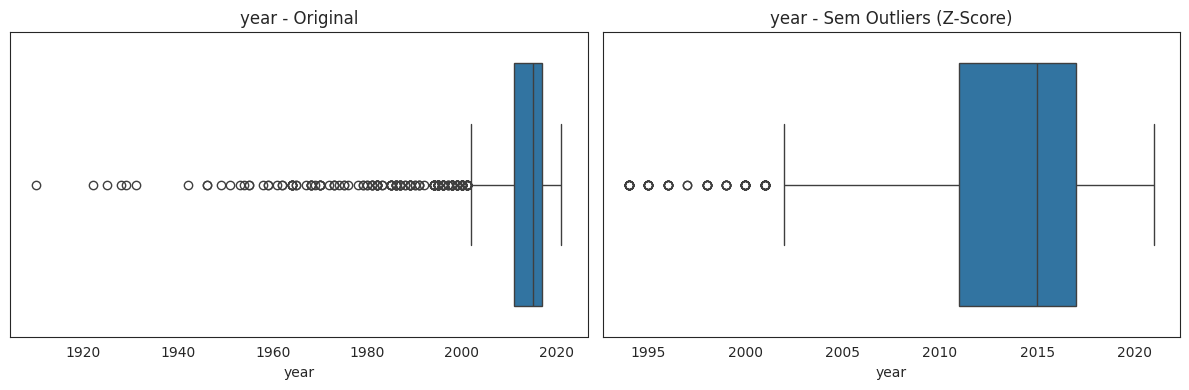

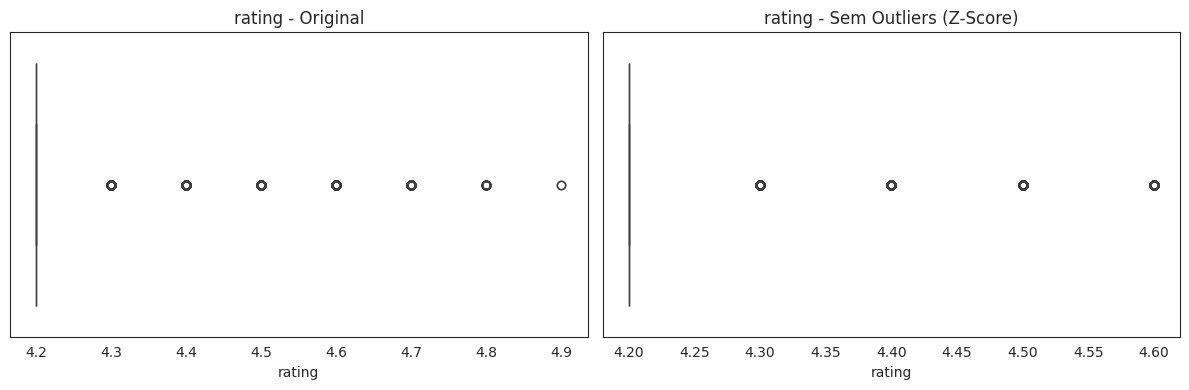

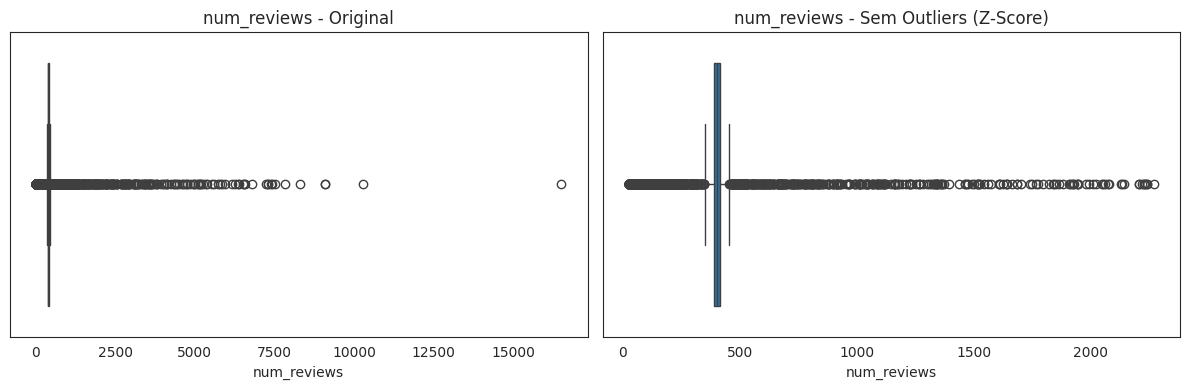

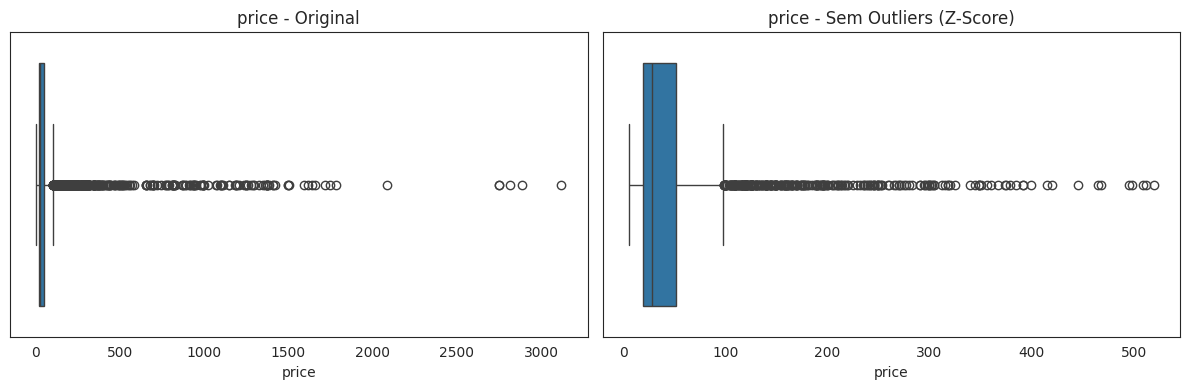

In [ ]:
for var in variaveis_quantitativas:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data=df, x=var, ax=axs[0]).set_title(f"{var} - Original")
    sns.boxplot(data=df_sem_outliers_zscore, x=var, ax=axs[1]).set_title(f"{var} - Sem Outliers (Z-Score)")
    plt.tight_layout()
    plt.show()


## Análise Univariada


In [ ]:
# @title Resumo estatístico pós imputação

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include=['object', 'category']))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

         winery     wine region       type rating_range year_range  \
count      7210     7210   7210       7210         7210       7045   
unique      445      777     72         21            4          3   
top     Contino  Reserva  Rioja  Rioja Red      4.0–4.2  2010-2020   
freq        457      467   2440       2359         5452       6303   

       price_range body_imputed acidity_imputed  
count         7210         7210            7210  
unique           4            4               3  
top         0-1000    Encorpado           Media  
freq          7159         4771            6893  


### Variáveis quantitativas

              year       rating   num_reviews        price
count  7210.000000  7210.000000   7210.000000  7210.000000
mean   2013.495839     4.255381    448.206935    61.508695
std       6.940450     0.118609    615.388822   152.837021
min    1910.000000     4.200000     25.000000     5.500000
25%    2011.000000     4.200000    389.000000    19.900000
50%    2015.000000     4.200000    404.000000    28.530000
75%    2017.000000     4.200000    415.000000    53.775000
max    2021.000000     4.900000  16505.000000  3119.080000


---
 Mantiveram-se os mesmos números

---

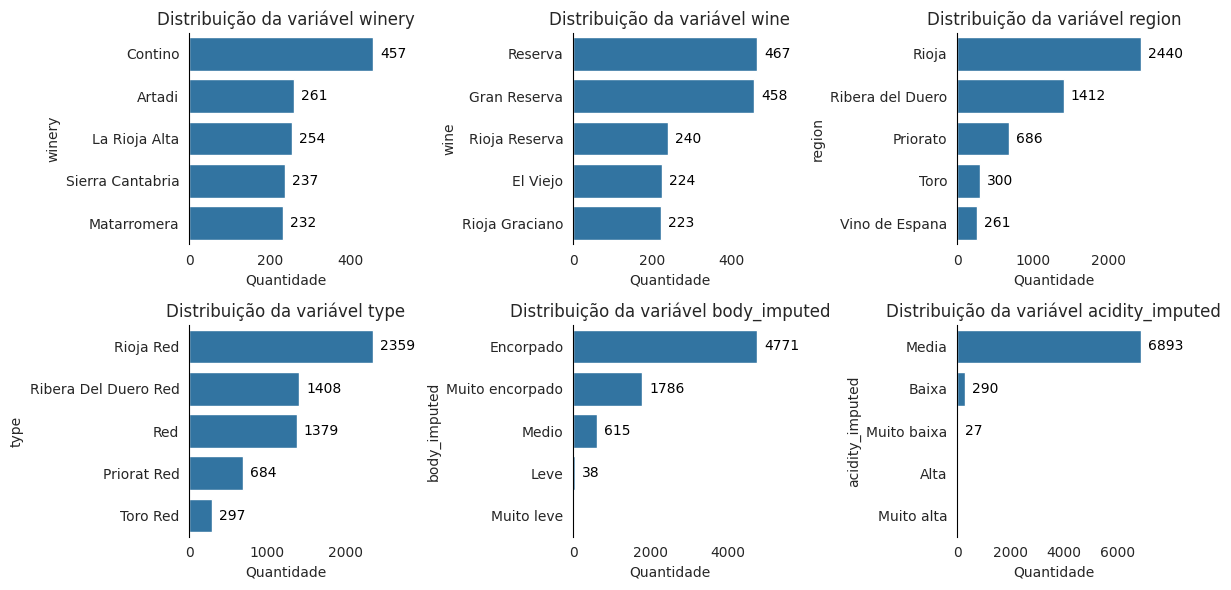

In [ ]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()
variaveis_qualitativas = [v for v in variaveis_qualitativas if v != 'country']  # Remover 'country'

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = df[variavel].value_counts().index[:5] # Pegar os 5 valores mais frequentes
    ax = axes[i]
    # Criar a figura
    ax = sns.countplot(data=df, y=variavel, order=order, alpha=1, ax=ax)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
        ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()

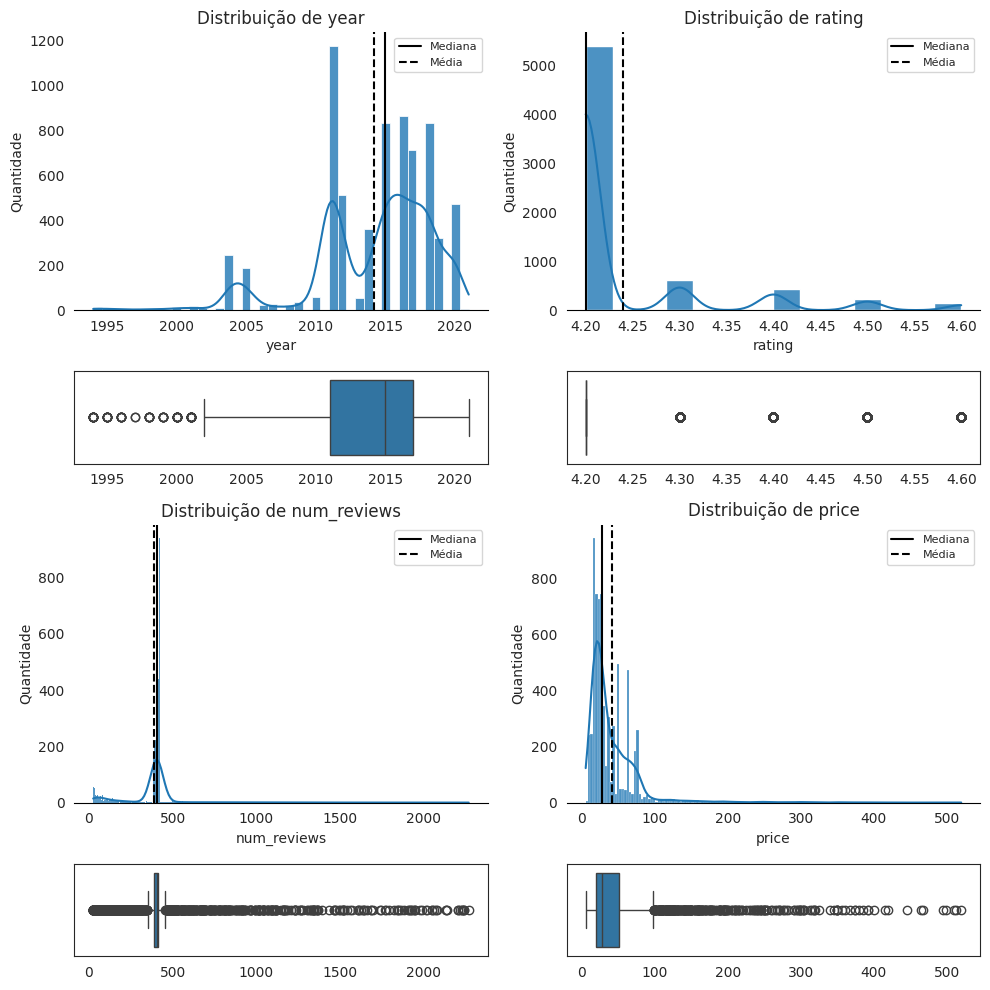

In [ ]:
# @title Variáveis quantitativas
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

n = len(variaveis_quantitativas)
ncols = 2
nrows = (n + 1) // ncols  # Arredondamento pra cima

fig, axes = plt.subplots(
    figsize=(10, 5 * nrows),
    ncols=ncols,
    nrows=nrows * 2,  # Cada variável usa 2 linhas: 1 para histograma/KDE, 1 para boxplot
    gridspec_kw={"height_ratios": [3, 1] * nrows}
)

axes = axes.reshape(nrows, 2, 2)  # (variável, [hist, box], coluna)

for idx, variavel in enumerate(variaveis_quantitativas):
    row = idx // ncols
    col = idx % ncols

    # Histograma + KDE
    ax = sns.histplot(data=df_sem_outliers_zscore, x=variavel, ax=axes[row][0][col], kde=True, alpha=.8)
    ax.axvline(df_sem_outliers_zscore[variavel].median(), color="black", label="Mediana")
    ax.axvline(df_sem_outliers_zscore[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição de {variavel}", ylabel="Quantidade")
    ax.legend(fontsize=8)
    ax.title.set_size(12)
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Boxplot
    sns.boxplot(data=df_sem_outliers_zscore, x=variavel, ax=axes[row][1][col])
    axes[row][1][col].set(xlabel="")

# Ocultar subplots não usados (caso o número de variáveis não seja par)
if n % ncols != 0:
    for j in range(2):
        axes[-1][j][1].axis("off")

plt.tight_layout()
plt.show()

## Análise Bivariada

### Relação Entre Variáveis Quantitativas

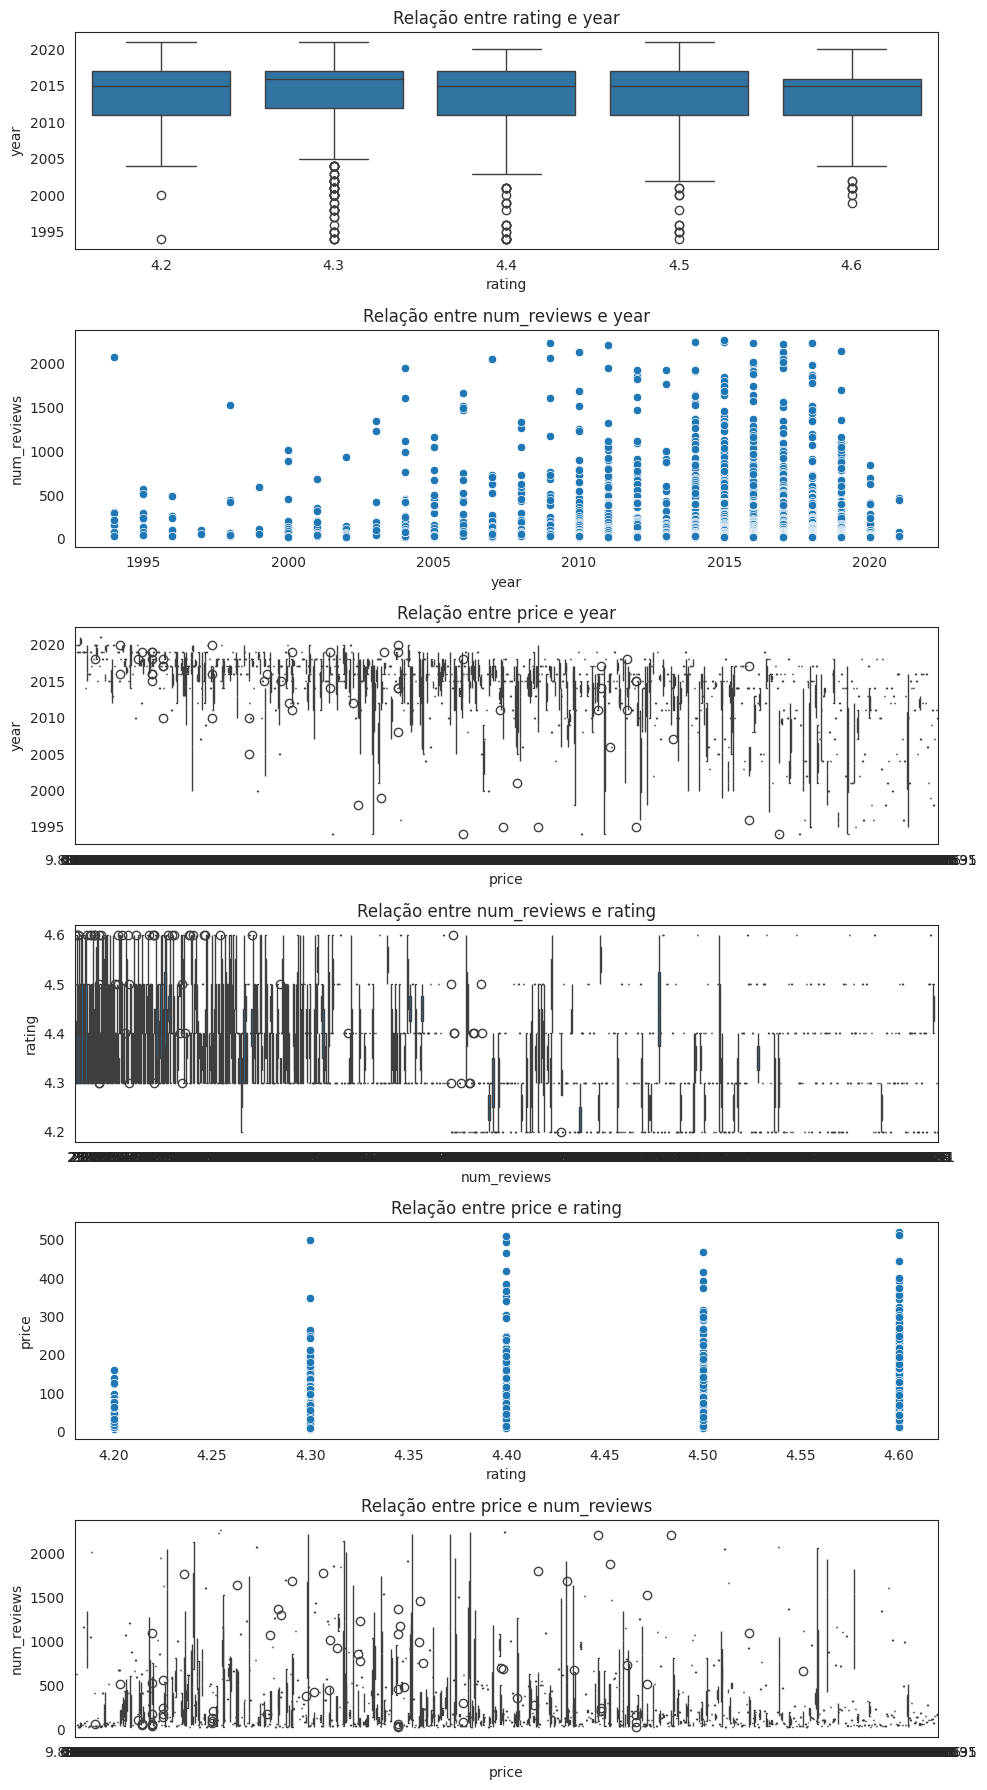

In [ ]:
# @title Comportamento par a par

combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
num_combinacoes = len(combinacoes)

# Ajustar número de colunas e linhas dinamicamente
ncols = 1  # Por exemplo, fixar em 3 colunas
nrows = (num_combinacoes + ncols - 1) // ncols  # Calcular número de linhas necessário

fig, axes = plt.subplots(figsize=(10, 3 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        sns.scatterplot(data=df_sem_outliers_zscore, x=var_1, y=var_2, ax=axes[i])
    else:
        sns.boxplot(data=df_sem_outliers_zscore, y=var_1, x=var_2, ax=axes[i])
    axes[i].set(title=f"Relação entre {var_2} e {var_1}")

# Remover eixos não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

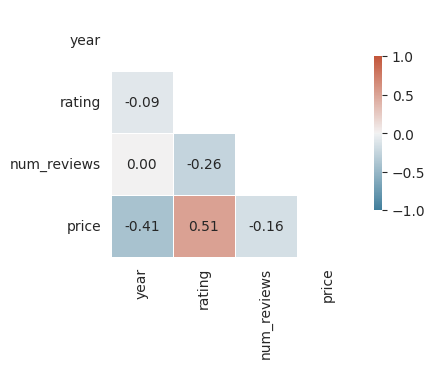

In [ ]:
# @title Correlação

corr = df_sem_outliers_zscore.corr(numeric_only=True)

# Gerar uma máscara para o triângulo
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

# Configurar a figura
f, ax = plt.subplots(figsize=(4, 4))

# Gerar um mapa de calor divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Faz o mapa de calor com a máscara e a proporção correta
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f"
)
plt.show()

## Análise multivariada

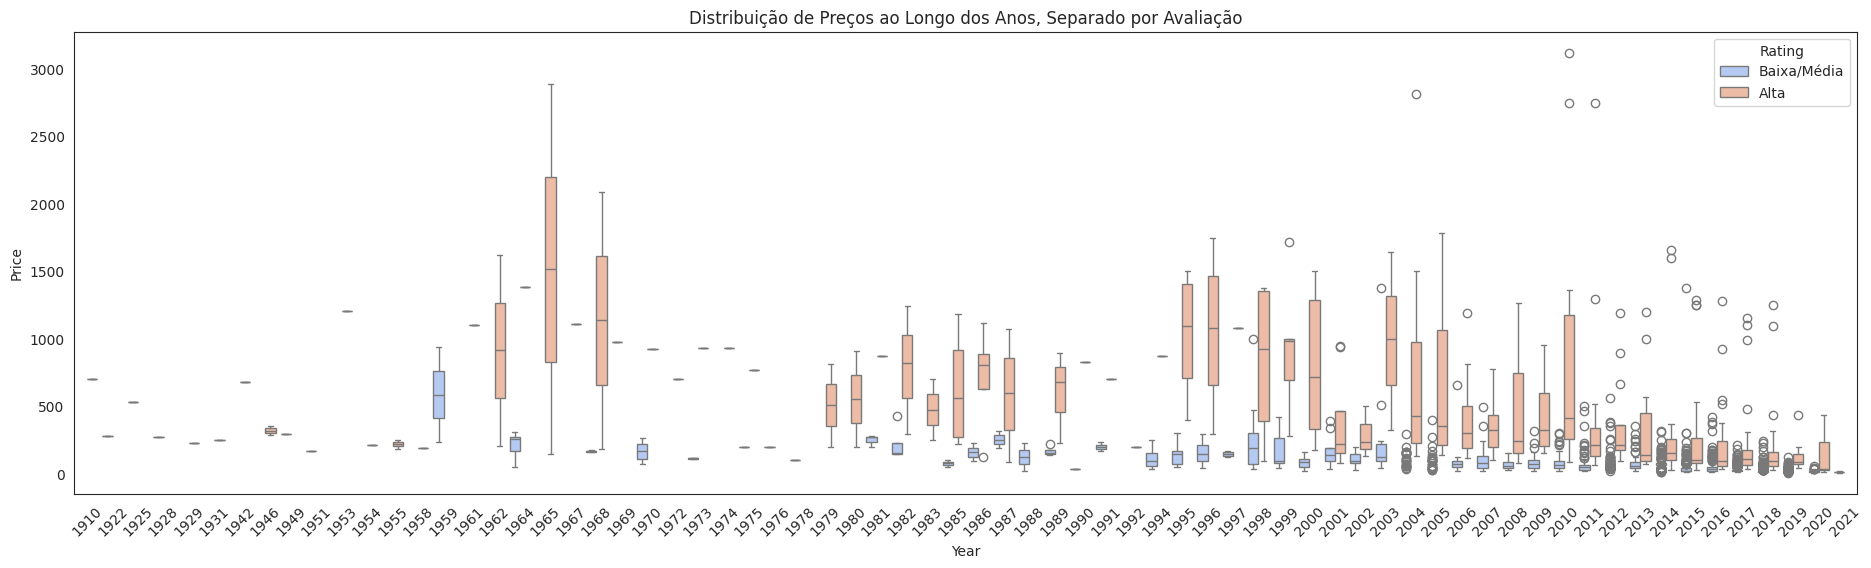

In [ ]:
# @title Distribuição de Preços por Ano  e Faixa de Avaliação
#criando uma categoria (ou faixa) de notas
df_filtrado['rating_bin'] = pd.cut(
    df_filtrado['rating'],
    bins=[df_filtrado['rating'].min(), 4.5, df_filtrado['rating'].max()],
    labels=["Baixa/Média", "Alta"],
    include_lowest=True
)

plt.figure(figsize=(23, 6))
sns.boxplot(data=df_filtrado, x='year', y='price', hue=df_filtrado['rating_bin'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribuição de Preços ao Longo dos Anos, Separado por Avaliação")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="Rating")
plt.show()

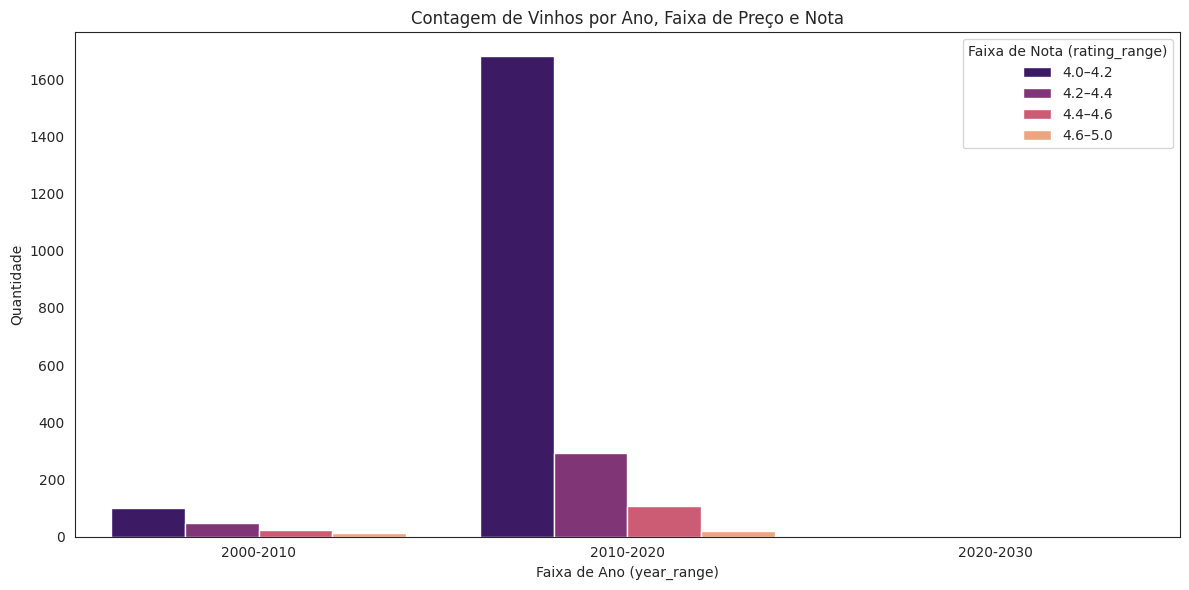

In [ ]:
# @title Gráfico de Contingência da Análise Multivariada
# Gráfico de barras agrupadas com Seaborn
plt.figure(figsize=(12,6))
sns.barplot(
    data=tabela_plot,
    x='year_range',
    y='count',
    hue='rating_range',
    palette='magma',
    errorbar=None
)
plt.title('Contagem de Vinhos por Ano, Faixa de Preço e Nota')
plt.xlabel('Faixa de Ano (year_range)')
plt.ylabel('Quantidade')
plt.legend(title='Faixa de Nota (rating_range)')
plt.tight_layout()
plt.show()

## Modelagem

In [ ]:
# @title Compração de modelos

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Copiar o DataFrame tratado
model = df_sem_outliers_zscore.copy()

# Variável alvo
target = 'price'


# Selecionar features (removendo 'price' e outras que não ajudam, se quiser)
features = model.drop(columns=[target])

# Separar variáveis numéricas e categóricas
variaveis_numericas = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
variaveis_categoricas = features.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding para variáveis categóricas
df_dummies = pd.get_dummies(model[variaveis_categoricas], drop_first=True)

# Dataset final para treino
X = pd.concat([model[variaveis_numericas], df_dummies], axis=1)
y = model[target]

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
modelos = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Avaliar todos os modelos
resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados.append({"Modelo": nome, "MSE": mse, "R²": r2})

# Mostrar resultados em DataFrame ordenado pelo R²
df_resultados = pd.DataFrame(resultados).sort_values(by="R²", ascending=False)
print("📊 Desempenho dos Modelos:\n")
print(df_resultados)


📊 Desempenho dos Modelos:

              Modelo         MSE        R²
1   Ridge Regression  447.694901  0.743617
0  Linear Regression  501.190288  0.712982
3      Random Forest  539.662091  0.690950
4  Gradient Boosting  565.316977  0.676258
2   Lasso Regression  630.002916  0.639214


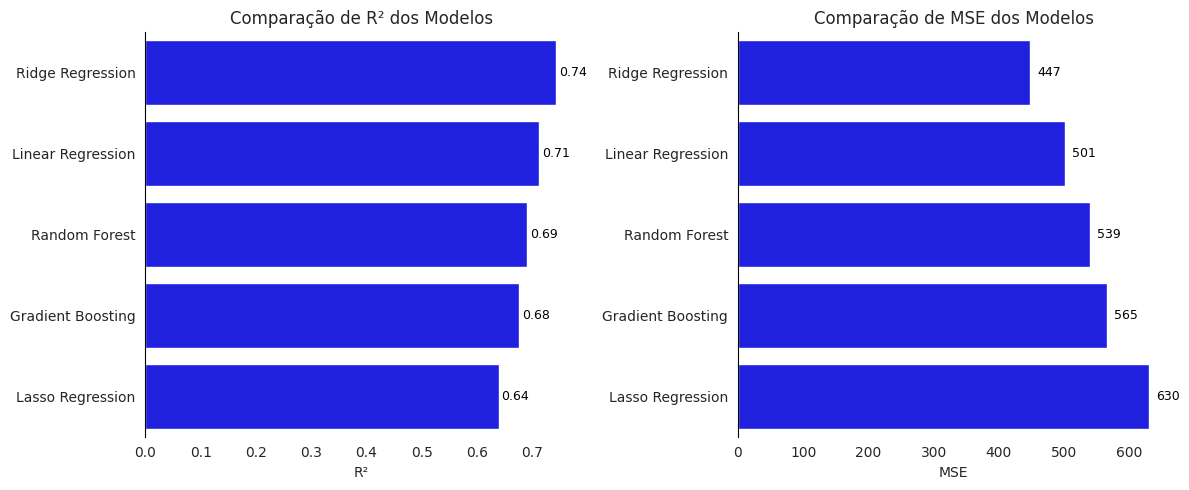

In [ ]:
# @title Gráficos dos modelos
# --- Gráficos ---
plt.figure(figsize=(12, 5))

# Gráfico de R²
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="R²", y="Modelo", data=df_resultados, color="blue")
ax1.bar_label(ax1.containers[0], fmt="%.2f", color="black", label_type="edge", padding=2, fontsize=9)
plt.title("Comparação de R² dos Modelos")
plt.xlabel("R²")
plt.ylabel("")
for side in ["bottom", "top", "right"]:
        ax1.spines[side].set_visible(False)
        ax1.spines["left"].set_color("black")

# Gráfico de MSE
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="MSE", y="Modelo", data=df_resultados.sort_values("MSE"), color="blue")
ax2.bar_label(ax2.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=9)
plt.title("Comparação de MSE dos Modelos")
plt.xlabel("MSE")
plt.ylabel("")
for side in ["bottom", "top", "right"]:
        ax2.spines[side].set_visible(False)
        ax2.spines["left"].set_color("black")

plt.tight_layout()
plt.show()

In [ ]:
# @title Testando otimização de hiperparâmetos

# from sklearn.model_selection import GridSearchCV

# parametros = {
#     'Ridge': {
#         'model': Ridge(),
#         'params': {'alpha': list(range(1, 31))}
#     },
#     'Lasso': {
#         'model': Lasso(max_iter=10000),  # aumentar iter para garantir convergência
#         'params': {'alpha': [x / 10 for x in range(1, 31)]}  # entre 0.1 e 3.0, mais comum para Lasso
#     },
#     'Random Forest': {
#         'model': RandomForestRegressor(random_state=42),
#         'params': {
#             'n_estimators': [10, 20, 30],  # ou range(1, 31)
#             'max_depth': list(range(1, 31, 5)),  # passo de 5 para não ficar pesado
#             'min_samples_split': [2, 5, 10]  # valores práticos
#         }
#     },
#     'Gradient Boosting': {
#         'model': GradientBoostingRegressor(random_state=42),
#         'params': {
#             'n_estimators': [50, 100],
#             'learning_rate': [0.01, 0.1],
#             'max_depth': [3, 5]
#         }
#     }
# }

# resultados_otimizados = []

# # Rodar GridSearchCV para cada modelo
# for nome, config in parametros.items():
#     print(f"🔍 Otimizando: {nome}...")
#     gs = GridSearchCV(
#         estimator=config['model'],
#         param_grid=config['params'],
#         scoring='r2',
#         cv=5,
#         n_jobs=-1
#     )
#     gs.fit(X_train, y_train)
#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     resultados_otimizados.append({
#         "Modelo": nome,
#         "Melhores Parâmetros": gs.best_params_,
#         "MSE": mse,
#         "R²": r2
#     })

# # Mostrar os resultados
# df_resultados_otimizados = pd.DataFrame(resultados_otimizados).sort_values(by="R²", ascending=False)
# print("\n📊 Desempenho dos Modelos Otimizados:\n")
# print(df_resultados_otimizados)

🔍 Otimizando: Ridge...
🔍 Otimizando: Lasso...
🔍 Otimizando: Random Forest...
🔍 Otimizando: Gradient Boosting...

📊 Desempenho dos Modelos Otimizados:

              Modelo                                Melhores Parâmetros  \
0              Ridge                                       {'alpha': 1}   
3  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
2      Random Forest  {'max_depth': 16, 'min_samples_split': 2, 'n_e...   
1              Lasso                                     {'alpha': 0.1}   

          MSE        R²  
0  447.694901  0.743617  
3  509.522845  0.708210  
2  567.588079  0.674958  
1  630.002916  0.639214  


---
O modelo já está com o melhor hiperparêmetro.

---


## Conclusão
---

Ridge Regression foi o melhor modelo, pois apresentou:

1.	Alto coeficiente de determinação (R²): A Ridge Regression alcançou um R² de 0,74, o que significa que ela explica uma porcentagem maior da variabilidade dos dados em comparação com os outros modelos apresentados.
2.	Baixo erro quadrático médio (MSE): O modelo apresenta o menor MSE de 447, indicando que faz previsões mais precisas em relação aos dados reais, com menor margem de erro.
Além disso, a Ridge Regression utiliza regularização, o que ajuda a evitar problemas de sobreajuste (overfitting), garantindo um melhor desempenho em dados novos.
3. Em síntese, sua combinação de alta acurácia explicativa (R² elevado) e baixa margem de erro (MSE) faz dela a escolha mais robusta nesse cenário.
---
